Mayo 2021
# Maximum Transportation
### Objetivo
Resolver una versión simplificada del problema de airline scheduling, al que llamamos *airport capacity*.

### Descripción del Problema de Optimización

**Airline Scheduling**

La industria aeroespacial es uno de los mercados más grandes y redituables del mundo. En esta industria cada movimiento es muy costoso y se disponen de recursos limitados (cierto número de aviones, pilotos, sobrecargos, vuelos antes del mantenimiento, horarios de despegue y aterrizaje, etc), por lo que deben de ser utilizados de manera eficiente para maximizar las ganancias de la aerolínea. Este es uno de los problemas más importantes de la industria y hasta ahora no tiene solución exacta. Resolver el problema de *airline scheduling* significa obtener un itinerario de los vuelos de la aerolínea en el que el mínimo número de aviones estén volando el mayor tiempo posible. Aquí es donde resulta útil el algoritmo de Ford – Fulkerson para flujo máximo.

**Maximum Transportation**

Este problema es un derivado del problema de *airline scheduling* y no tiene un nombre estándar por lo que lo llamaremos *maximum transportation*. En este caso no nos enfocamos tanto en las aerolíneas en sí, si no en los aeropuertos en los que tienen sede. Se toman en cuenta horarios definidos de despegues y aterrizajes, cantidad de pasajeros por vuelo así como posibles escalas que puedan tenerse para obtener el máximo número de personas que pueden volar de una ciudad a otra con los vuelos actualmente disponibles.

En nuestro caso, para simplificar la resolución del problema asumiremos que todas las escalas son posibles independientemente de las horas de despegue y aterrizaje.

Decimos que se trata de un problema derivado del anterior ya que estamos hablando de restricciones específicas de aviones, si estuvieramos hablando de trenes entonces nos encontrariamos con que el problema de *maximum transportation* es el problema original con el T. E. Harris y F. S. Ross plantearon por primera vez el problema de flujo máximo en su artículo de 1954.


### Decripción del dataset
El dataset a utilizar viene de un repositorio en [github](https://github.com/sid-7/Airline_Maximum_Flow). Originalmente, estos datos fueron obtenidos utilizando la [API](https://api.flightstats.com/flex/schedules/rest/v1/json/from/LAX/to/JFK/departing/2019/1/6) de [flightstats](https://developer.flightstats.com/) pero elegímos utilizar los del repositorio por facilidad ya que se encontraban limpios y en el formato y con los joins que necesitabamos.

El dataset contiene información de los vuelos del 6 enero de 2019 de una cierta aerolínea en Estados Unidos y muestra los registros de sus 565 vuelos de ese día para únicamente 10 aeropuertos. En vez de colocar el nombre explícito del aeropuerto, se muestra su identificador único de 3 letras, a continuación diccionario:

| Identificador | Nombre | Ciudad |
|---------------|--------|--------|
| ATL | Hartsfield-Jackson Atlanta International | Atlanta |
| BOS | Boston-Logan International | Boston |
| DEN | Denver International | Denver |
| IAD | Washington Dulles International | Washington |
| JFK | New York John F. Kennedy International | New York |
| LAX | Los Angeles International | Los Angeles |
| ORD | Chicago O'Hare International | Chicago |
| PHX | Phoenix Sky Harbor International | Phoenix |
| SEA | Seattle-Tacoma International | Seattle |
| SFO | San Francisco International | San Francisco |

El dataset cuenta con cinco columnas:

   + Source: identificador del aeropuerto origen del que sale el vuelo
   + Destination: identificador del aeropuerto destino al que llega el vuelo
   + Departure: hora de despegue del vuelo en el aeropuerto origen en horas militares
   + Arrival: hora de aterrizaje del vuelo en el aeropuerto destino en horas militares
   + capacity: cantidad máxima de pasajeros que puede transportar el vuelo (sin contar al crew)

Además, no presenta ningún valor nulo.



Antes que nada, instalamos los paquetes necesarios.

In [12]:
!pip install ../ffmaxc/

Processing /home/diramtz/Documents/Optimizacion/ProyectoFinal_MaxFlow/ffmaxc
  Created wheel for UNKNOWN: filename=UNKNOWN-0.0.0-cp38-cp38-linux_x86_64.whl size=250166 sha256=f8a7122f23e6dcd43713458b9f33677cd70853e129c4c7f020c1e7d5410ea1f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-g7i8kfz7/wheels/64/ec/00/07fbc8f81d14bd6e084a678ffbbd60843bf4aaa867d0489e69
Successfully built UNKNOWN
  Attempting uninstall: UNKNOWN
    Found existing installation: UNKNOWN 0.0.0
    Uninstalling UNKNOWN-0.0.0:
      Successfully uninstalled UNKNOWN-0.0.0


In [2]:
import requests
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from timeit import timeit

In [3]:
import ffmaxflow as ff

In [4]:
url = 'https://raw.githubusercontent.com/sid-7/Airline_Maximum_Flow/master/flights.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])
data = df.values
unique_nodes = np.unique(np.hstack((data[:,0],data[:,1])))


In [5]:
df

,Source,Destination,Depature,Arrival,capacity
0,ORD,ATL,530,829,185
1,BOS,ATL,545,854,185
2,LAX,SEA,600,900,165
3,PHX,ATL,600,1127,185
4,SFO,ATL,600,1332,230
...,...,...,...,...,...
146,BOS,ORD,1330,1533,160
147,BOS,ORD,600,805,160
148,BOS,JFK,601,726,102
149,BOS,JFK,1217,1339,128


## Solución con ffmaxflow
Supongamos que queremos saber el el máximo número de personas que pueden viajar de Denver a Atlanta.

In [8]:
red = ff.create_flow_network()

In [9]:
for node in unique_nodes:
    
    if node == 'DEN':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [11]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [12]:
red.MaxFlow()

10179

## Solución con ffmaxc

Creamos la red y encontramos los nodos únicos:

In [14]:
import ffmaxc as ffc
red = ffc.create_flow_network()

In [16]:
for node in unique_nodes:
    
    if node == 'DEN':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

Definimos los arcos:

In [18]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [19]:
%%time
red.MaxFlow()

CPU times: user 59.1 s, sys: 103 ms, total: 59.2 s
Wall time: 59.2 s


10179.0

## Solución con networkx

Ahora con ayuda de la paquetería de networkx comprobamos que nuestros paquetes den el resultado correcto.

In [20]:
G = nx.DiGraph()

In [21]:
for row in range(data.shape[0]):
    G.add_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), capacity = data[row,2])

In [22]:
flow_value, flow_dict = nx.maximum_flow(G, 'DEN', 'ATL')

In [23]:
flow_value

9638

Notamos que el resultado devuelto por networks no se parece en nada al que arrojaron nuestros paquetes, de hecho ni siquiera tiene el mismo orden de magnitud.

Después de investigar un poco, dimos con el problema. Cuando tienes varios arcos entre un par específico de nodos, al definir el arco utilizamos los mismo nombres de estos dos nodos una y otra vez. La diferencia entre `ffmaxflow` y `networkx` es que `ffmaxflow` guarda cada uno de estos vértices de manera independiente, sin importar que sus parámetros sean los mismos, mientras que `networkx` sobrescribe cada arco que llama a un par de nodos que ya se tenían guardados bajo otro arco.

Entonces, si sumamos todas las capacidades (cantidad de pasajeros) por ruta y metemos esta nueva red resumida a `networkx` deberíamos de obtener el mismo resultado que con `ffmaxflow`.

### Sumando todos los pasajeros de la ruta

In [43]:
suma_df = df.groupby(['Source', 'Destination'])['capacity'].sum().reset_index()
suma_df

,Source,Destination,capacity
0,ATL,BOS,2035
1,ATL,DEN,1440
2,ATL,IAD,884
3,ATL,JFK,1350
4,ATL,ORD,2235
...,...,...,...
67,SFO,IAD,760
68,SFO,JFK,102
69,SFO,ORD,1930
70,SFO,PHX,1254


In [44]:
new_data = suma_df.values

In [45]:
G = nx.DiGraph()

In [46]:
for row in range(new_data.shape[0]):
    G.add_edge('{}'.format(new_data[row,0]), '{}'.format(new_data[row,1]), capacity = new_data[row,2])

In [47]:
flow_value, flow_dict = nx.maximum_flow(G, 'DEN', 'ATL')

In [48]:
flow_value

10179

Y ahora sí, vemos que se obtuvo el mismo resultado que con `ffmaxflow` y `ffmaxc`, por lo que nuestra  implementación es correcta.

## Gráfica de las rutas

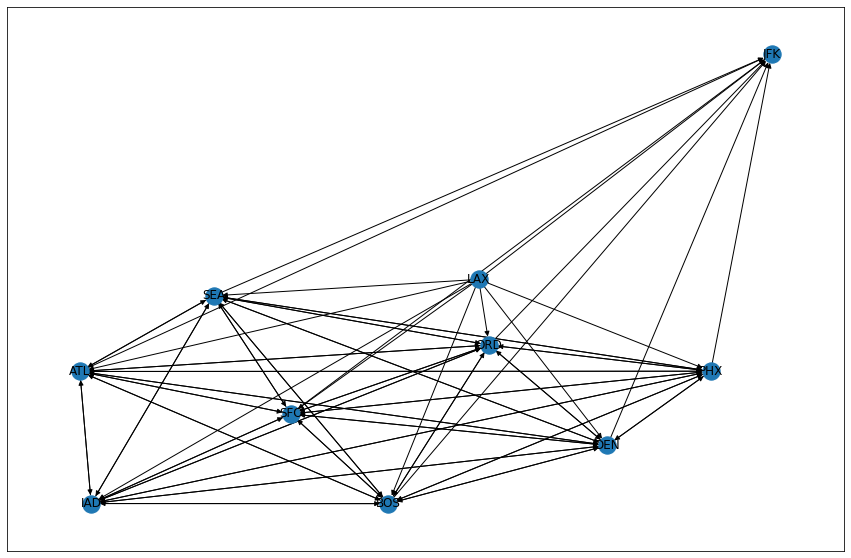

In [36]:
plt.figure(figsize = (15,10))
nx.draw_networkx(G)

## Ejemplos
Estos ejemplos además de ser ilustrativos para familiarizarse con el uso del paquete, están pensados para ejecutarse en un pipeline con minikube, kubeflow y kale. Notamos que sólo medimos el tiempo que tarda en calcular el path para el flujo máximo y no la creación de nodos y arcos, pues estas celdas se corren muy rápido y no afectan significativamente al tiempo de ejecución.

### 1. De Denver a Atlanta

#### con ffmaxflow

Inicializamos la red:

In [14]:
red = ff.create_flow_network()

Creamos los nodos:

In [16]:
for node in unique_nodes:
    
    if node == 'DEN':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

Definimos los arcos:

In [18]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

Y calculamos el flujo máximo:

In [19]:
%%time
red.MaxFlow()

CPU times: user 59.1 s, sys: 103 ms, total: 59.2 s
Wall time: 59.2 s


10179.0

#### con ffmaxc

Inicializamos la red:

In [6]:
red = ffc.create_flow_network()

Creamos los nodos:

In [9]:
for node in unique_nodes:
    
    if node == 'DEN':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

Definimos los arcos:

In [10]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

Y calculamos el flujo máximo:

In [11]:
%%time
red.MaxFlow()

CPU times: user 58.7 s, sys: 145 ms, total: 58.8 s
Wall time: 58.6 s


10179.0

### 2. De Boston a Seattle

#### con ffmaxflow

In [14]:
red = ff.create_flow_network()

In [15]:
for node in unique_nodes:
    
    if node == 'BOS':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'SEA':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [16]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [17]:
%%time
red.MaxFlow()

CPU times: user 1min 25s, sys: 16 µs, total: 1min 25s
Wall time: 1min 25s


7374

#### con ffmaxc

In [18]:
red = ffc.create_flow_network()

In [19]:
for node in unique_nodes:
    
    if node == 'BOS':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'SEA':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [20]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [21]:
%%time
red.MaxFlow()

CPU times: user 1min 20s, sys: 210 ms, total: 1min 20s
Wall time: 1min 26s


7374.0

### 3. De Washington a Phoenix

#### con ffmaxflow

In [22]:
red = ff.create_flow_network()

In [23]:
for node in unique_nodes:
    
    if node == 'IAD':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'PHX':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [24]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [25]:
%%time
red.MaxFlow()

CPU times: user 6min 6s, sys: 34.4 ms, total: 6min 6s
Wall time: 6min 48s


5492

#### con ffmaxc

In [26]:
red = ffc.create_flow_network()

In [27]:
for node in unique_nodes:
    
    if node == 'IAD':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'PHX':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [28]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [29]:
%%time
red.MaxFlow()

CPU times: user 5min 50s, sys: 683 ms, total: 5min 51s
Wall time: 6min 37s


5492.0

### 4. De San Francisco a Atlanta

#### con ffmaxflow

In [30]:
red = ff.create_flow_network()

In [31]:
for node in unique_nodes:
    
    if node == 'SFO':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [32]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [33]:
%%time
red.MaxFlow()

CPU times: user 2min 2s, sys: 8.03 ms, total: 2min 2s
Wall time: 2min 13s


10352

#### con ffmaxc

In [34]:
red = ffc.create_flow_network()

In [35]:
for node in unique_nodes:
    
    if node == 'SFO':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)

In [36]:
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])

In [37]:
%%time
red.MaxFlow()

CPU times: user 1min 59s, sys: 260 ms, total: 2min
Wall time: 2min 8s


10352.0

## Tabla de Tiempos para viaje de Denver a Atlanta con timeit
En los ejemplos anteriores medimos el tiempo de ejecución tanto del paquete original como de la reimplementación, sin embargo una sóla medición tiende a ser ruidosa ya que a veces se toman en cuenta procesos que corren en el fondo. Una mejor medición sería hacer el promedio de varias mediciones con ayuda de `timeit`.

**ffmaxflow**

In [5]:
setup_code = """import ffmaxflow as ff
import numpy as np
import pandas as pd
                
url = 'https://raw.githubusercontent.com/sid-7/Airline_Maximum_Flow/master/flights.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])
data = df.values
    
"""

statement = """
red = ff.create_flow_network()
unique_nodes = np.unique(np.hstack((data[:,0],data[:,1])))
           
for node in unique_nodes: 
    if node == 'DEN':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)
                    
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])
            
red.MaxFlow()  
            
"""

print (timeit(setup = setup_code, stmt = statement, number = 10)) 

641.4799938199976


In [10]:
print("Tiempo promedio de una ejecución: {} segundos".format(641.4799/10))

Tiempo promedio de una ejecución: 64.14799000000001 segundos


**ffmaxc**

In [4]:
setup_code = """import ffmaxc as ffc
import numpy as np
import pandas as pd
                
url = 'https://raw.githubusercontent.com/sid-7/Airline_Maximum_Flow/master/flights.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])
data = df.values
    
"""

statement = """
red = ffc.create_flow_network()
unique_nodes = np.unique(np.hstack((data[:,0],data[:,1])))
           
for node in unique_nodes: 
    if node == 'DEN':
        red.create_vertex('{}'.format(node), True, False)
    
    elif node == 'ATL':
        red.create_vertex('{}'.format(node), False, True)
    
    else:
        red.create_vertex('{}'.format(node), False, False)
                    
for row in range(data.shape[0]):
    red.create_edge('{}'.format(data[row,0]), '{}'.format(data[row,1]), data[row,4])
            
red.MaxFlow()  
            
"""

print (timeit(setup = setup_code, stmt = statement, number = 10)) 

566.4257510969983


In [12]:
print("Tiempo promedio de una ejecución: {} segundos".format(566.4257/10))

Tiempo promedio de una ejecución: 56.64257 segundos


**networkx**

In [8]:
setup_code = """import networkx as nx
import numpy as np
import pandas as pd
                
url = 'https://raw.githubusercontent.com/sid-7/Airline_Maximum_Flow/master/flights.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])
sum = df.groupby(['Source', 'Destination'])['capacity'].sum().reset_index()
new_data = sum.values
    
"""

statement = """
G = nx.DiGraph()

for row in range(new_data.shape[0]):
    G.add_edge('{}'.format(new_data[row,0]), '{}'.format(new_data[row,1]), capacity = new_data[row,2])

flow_value, flow_dict = nx.maximum_flow(G, 'DEN', 'ATL')
            
"""

print (timeit(setup = setup_code, stmt = statement, number = 10)) 

0.020034563000081107


In [13]:
print("Tiempo promedio de una ejecución: {} segundos".format(0.0200/10))

Tiempo promedio de una ejecución: 0.002 segundos


La tabla de tiempos resulta entonces:

| Paquete | Resultado | Tiempo de ejecución promedio |
|--------|-----------|---------------------|
| ffmaxflow | 10179 | 64 s |
| ffmaxc | 10179 | 56 s |
| networkx | 10179 | 0.002 s |

## Apéndice A: Características de la máquina

In [1]:
%%bash
lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   39 bits physical, 48 bits virtual
CPU(s):                          8
On-line CPU(s) list:             0-7
Thread(s) per core:              2
Core(s) per socket:              4
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           60
Model name:                      Intel(R) Core(TM) i7-4712HQ CPU @ 2.30GHz
Stepping:                        3
CPU MHz:                         3022.389
CPU max MHz:                     3300.0000
CPU min MHz:                     800.0000
BogoMIPS:                        4589.31
Virtualization:                  VT-x
L1d cache:                       128 KiB
L1i cache:                       128 KiB
L2 cache:                        1 MiB
L3 cache:                       

## Referencias
+ [Airline Scheduling with Max Flow algorithm](http://ilab-australia.org/jms/wp-content/uploads/2018/09/28.-P.ICT_.012.pdf)
+ [Maximum Flow Problem](https://en.wikipedia.org/wiki/Maximum_flow_problem)
+ [Airport Capacity Profiles](https://www.faa.gov/airports/planning_capacity/profiles/)